In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

pd.set_option('display.max_columns', None)
sns.set_context('paper')

In [2]:
train_df = pd.read_csv('Training.csv')
test_df = pd.read_csv('Testing.csv')

In [3]:
train_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2455,3,126,88,41,235,39.3,0.704,27,0
2456,4,123,62,0,0,32.0,0.226,35,1
2457,1,80,74,11,60,30.0,0.527,22,0
2458,1,96,64,27,87,33.2,0.289,21,0


In [4]:
test_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,120,72,22,56,20.8,0.733,48,0
1,1,71,62,0,0,21.8,0.416,26,0
2,8,74,70,40,49,35.3,0.705,39,0
3,5,88,78,30,0,27.6,0.258,37,0
4,10,115,98,0,0,24.0,1.022,34,0
...,...,...,...,...,...,...,...,...,...
303,10,101,76,48,180,32.9,0.171,63,0
304,2,122,70,27,0,36.8,0.340,27,0
305,5,121,72,23,112,26.2,0.245,30,0
306,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.00000,2768.000000,2768.000000,2768.000000
mean,3.822616,121.421965,68.980491,20.549494,79.853324,31.97659,0.486277,32.923049,0.380419
std,3.305432,31.721258,19.133100,15.779713,115.655771,7.76054,0.357403,11.362964,0.485578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.17500,0.248000,24.000000,0.000000
50%,3.000000,117.000000,71.000000,23.000000,36.000000,32.10000,0.380000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.50000,0.645250,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


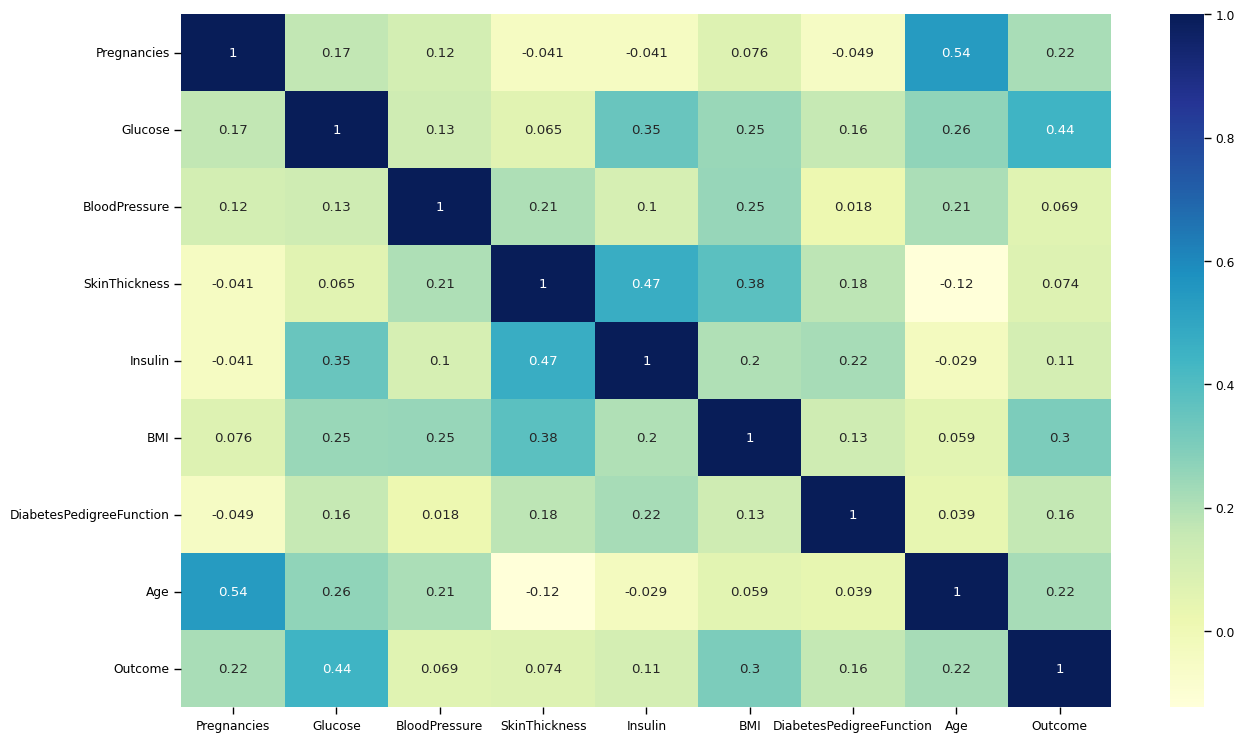

In [9]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

Checking the Data Distributions

In [10]:
def plot_features(data, features, features_type='categorical', plot_distribution=False, font_scale=1):
    if features_type not in ['categorical', 'numerical']:
        raise ValueError(f'features_type can be either categorical or numerical:'
                         f'{features_type} was provided')
    fig, ax = plt.subplots(int(len(features)/2), 2, figsize=(30, 45))
    sns.set_theme(font_scale=font_scale)
    for col, subplot in zip(features, ax.reshape(-1)):
        if plot_distribution:
            sns.histplot(data, x=col, hue="Outcome", ax=subplot)
        elif features_type == 'categorical':
            sns.countplot(data=data, x=col, hue="Outcome", ax=subplot).set_title(f"Outcome for {col}")
        else:
            sns.boxplot(data=data, hue='Outcome', y=col, ax=subplot).set_title(f"{col} distribution")
    fig.show()

C:\Users\Moiz\AppData\Local\Temp\ipykernel_12908\2684154144.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


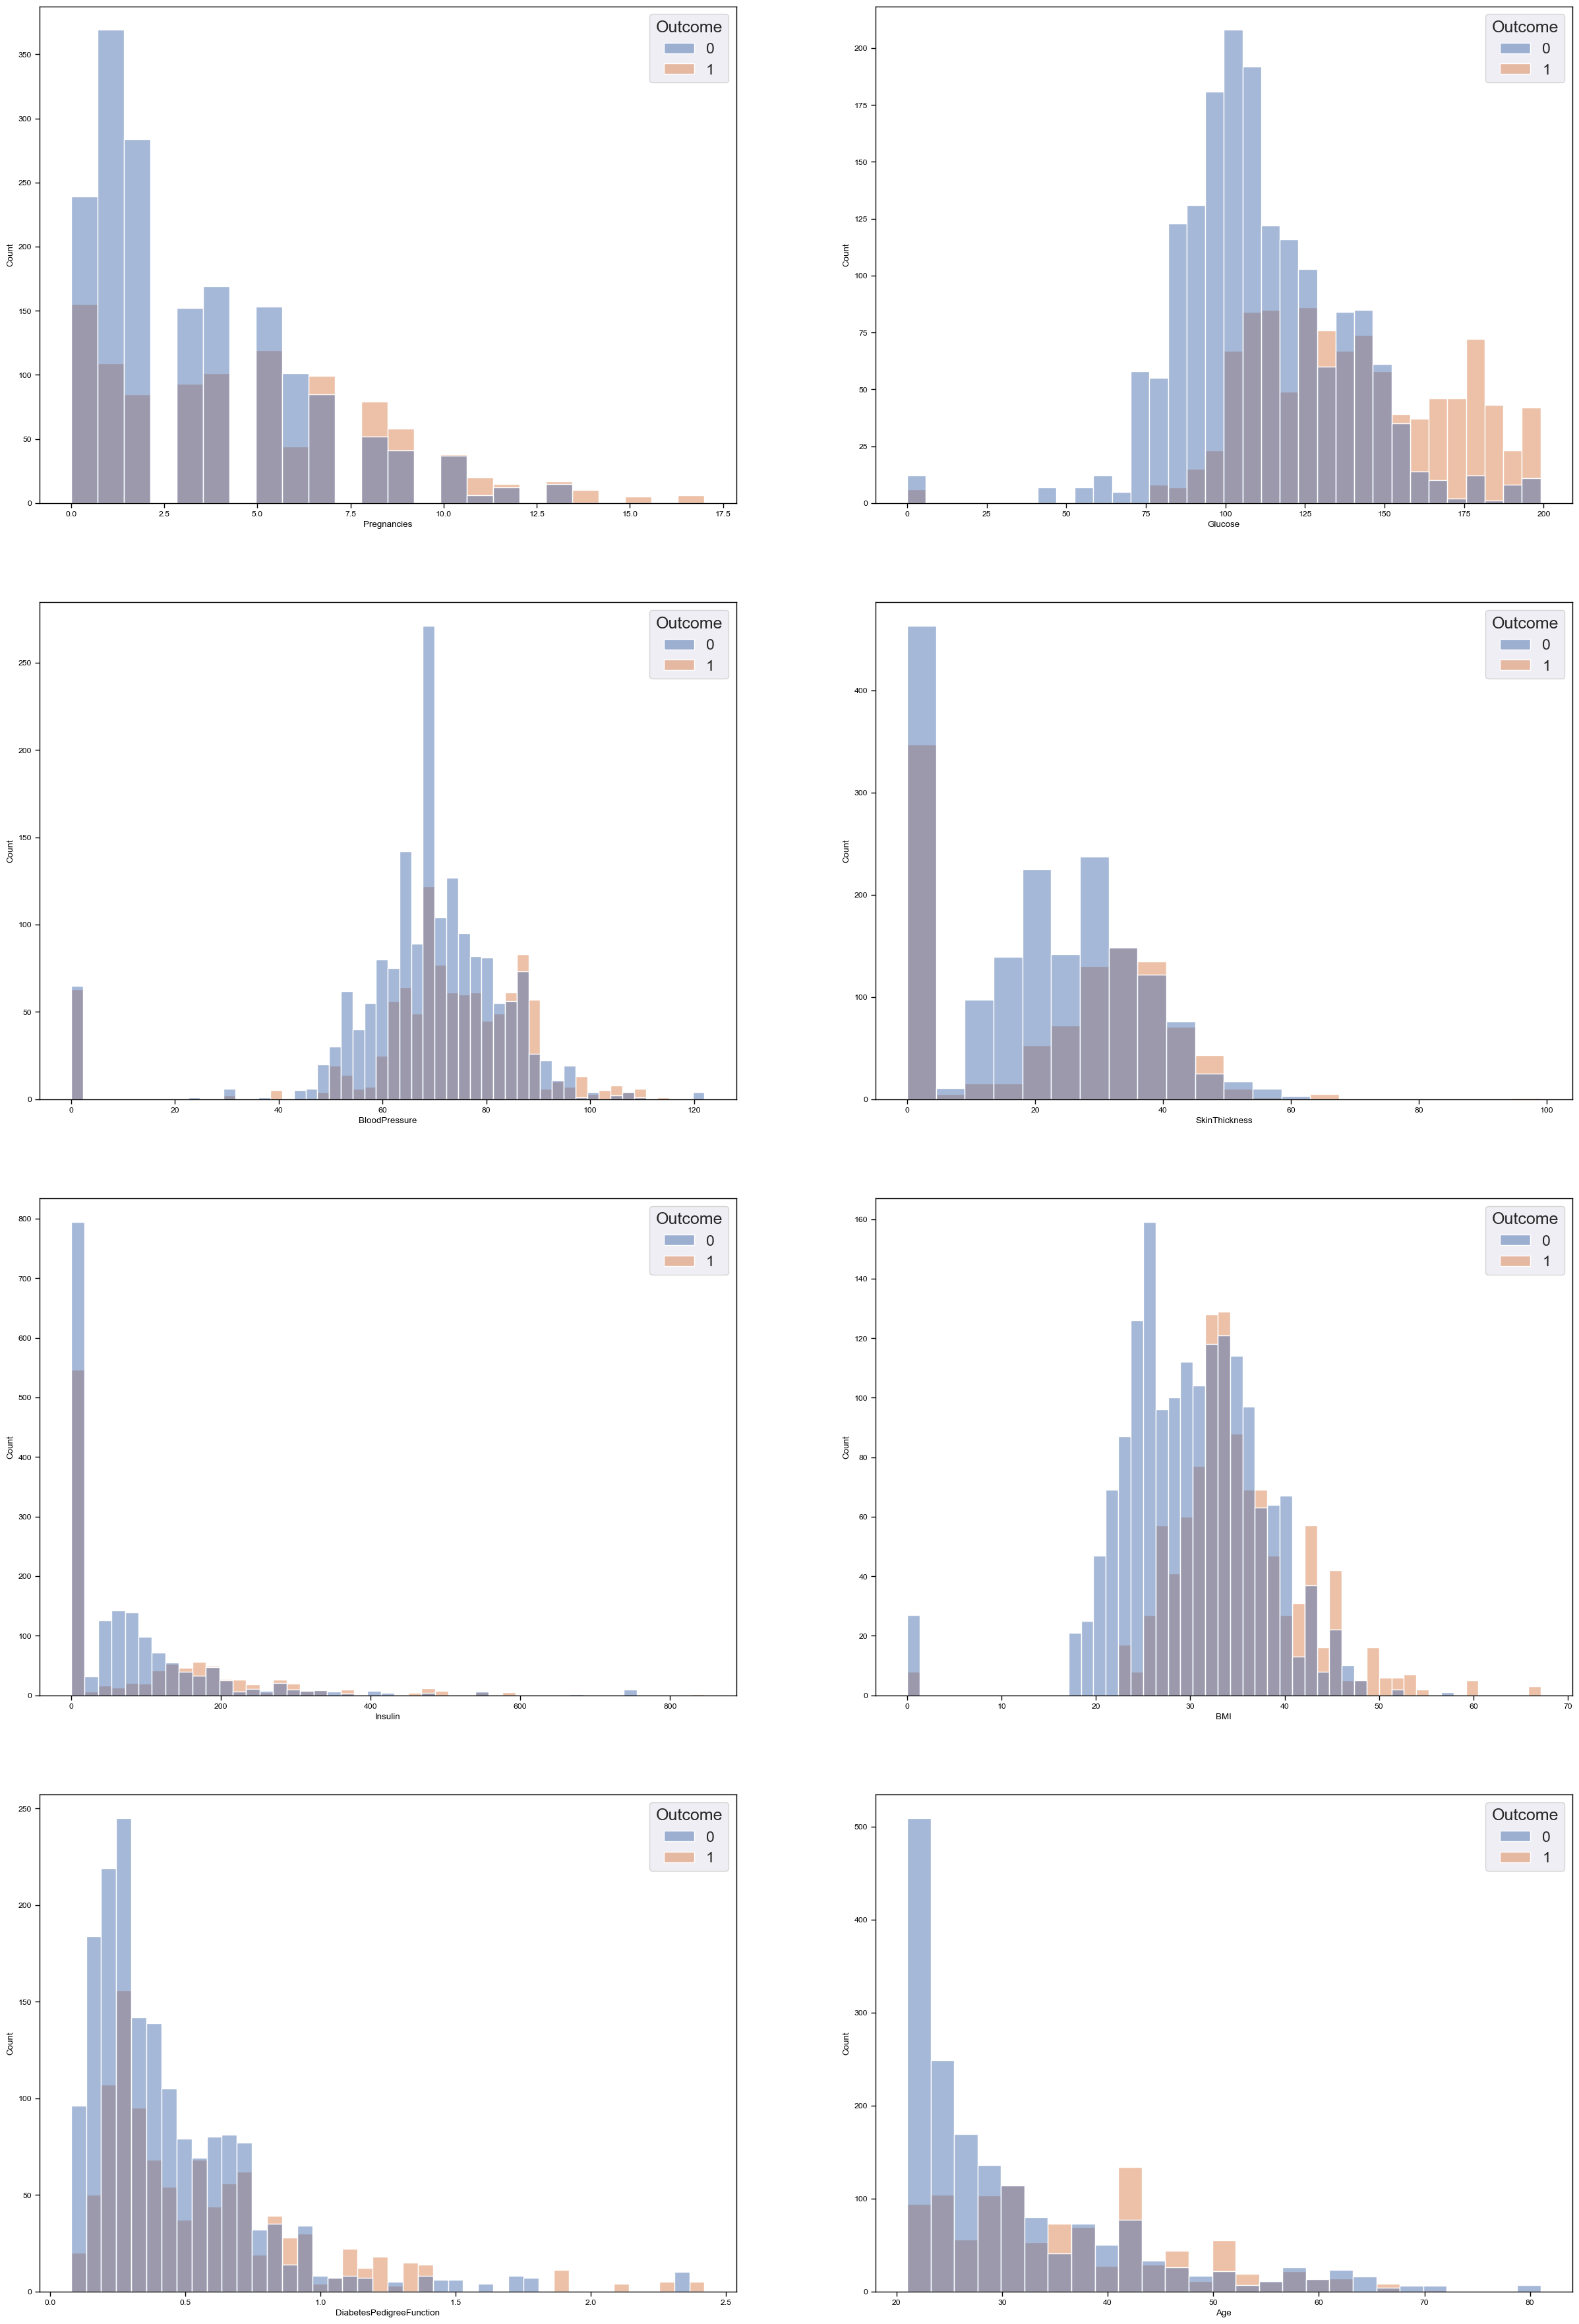

In [11]:
plot_features(df, df.drop('Outcome', axis=1).columns, features_type='numerical', plot_distribution=True, font_scale=1.5)

C:\Users\Moiz\AppData\Local\Temp\ipykernel_12908\2684154144.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


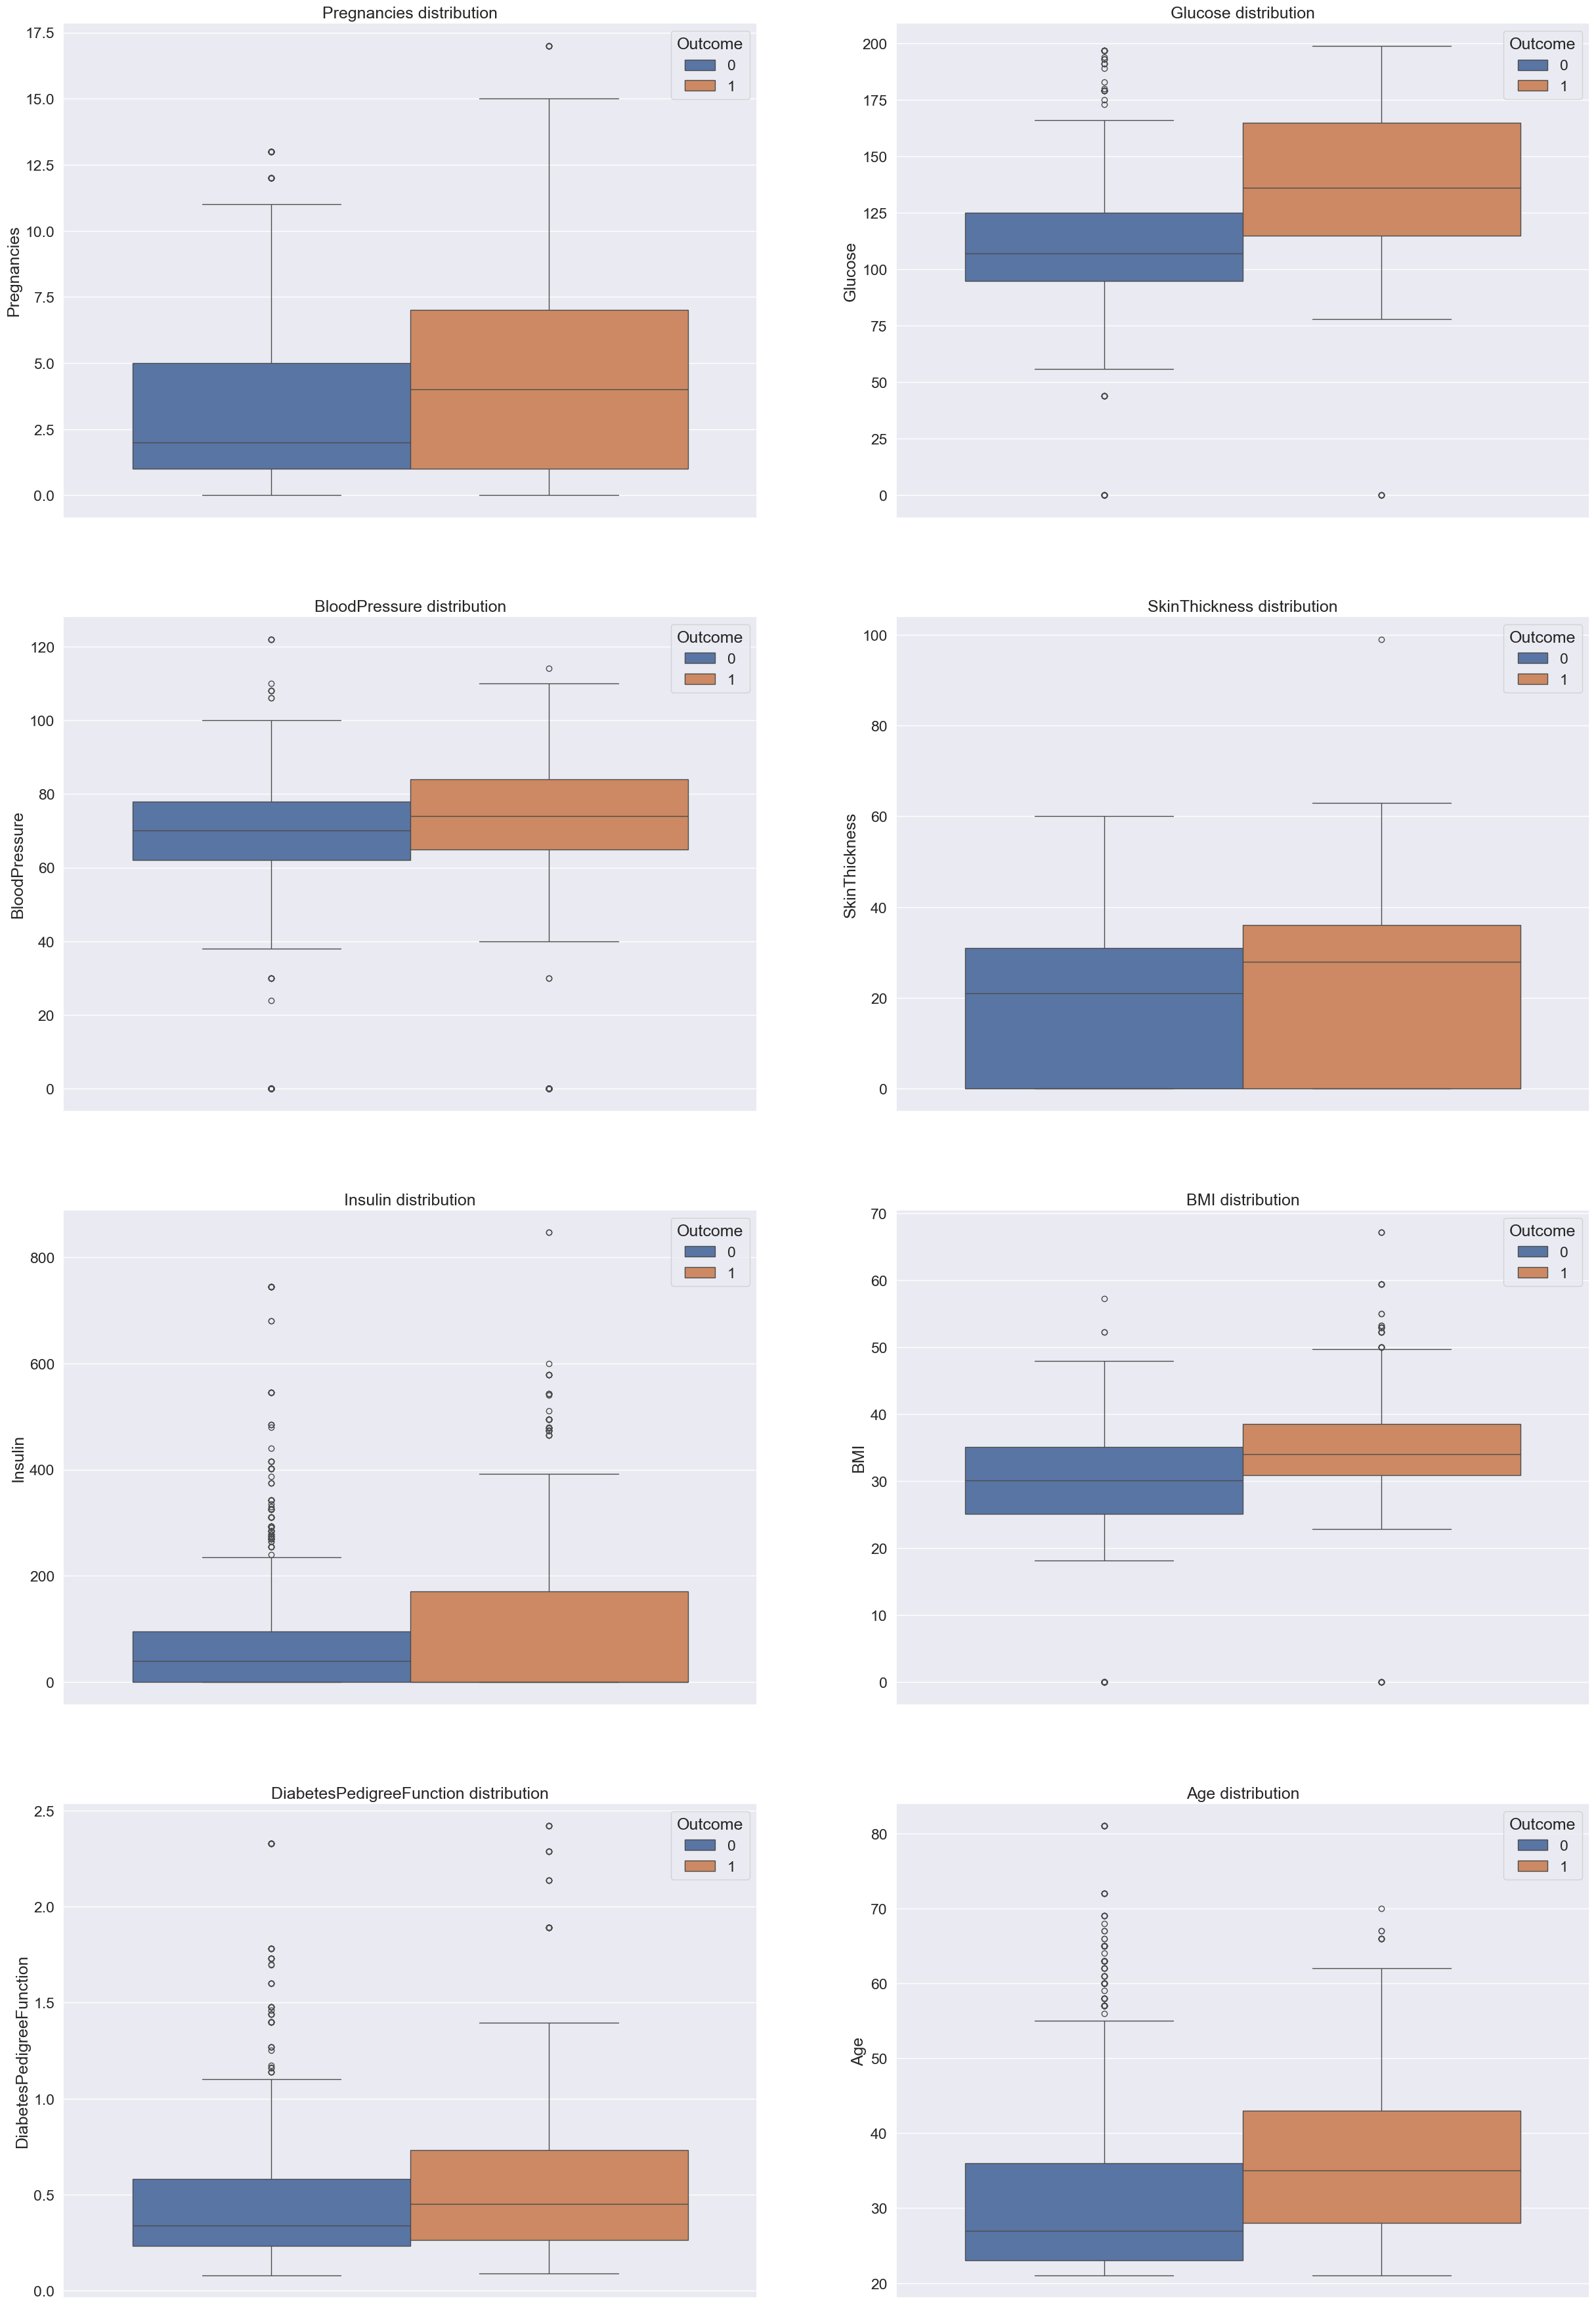

In [13]:
plot_features(df, df.drop('Outcome', axis=1).columns, features_type='numerical', font_scale=1.5)

In [15]:
df.corr() > 0.05

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,True,True,True,False,False,True,False,True,True
Glucose,True,True,True,True,True,True,True,True,True
BloodPressure,True,True,True,True,True,True,False,True,True
SkinThickness,False,True,True,True,True,True,True,False,True
Insulin,False,True,True,True,True,True,True,False,True
BMI,True,True,True,True,True,True,True,True,True
DiabetesPedigreeFunction,False,True,False,True,True,True,True,False,True
Age,True,True,True,False,False,True,False,True,True
Outcome,True,True,True,True,True,True,True,True,True


---
# Splitting and Scaling Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), 
                                                    df['Outcome'],
                                                    test_size=0.2,
                                                    random_state=3,
                                                    shuffle=True,
                                                    stratify=df['Outcome'])

In [17]:
scaler = StandardScaler()
scaler.fit(X_train, y_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


# Model Training

In [40]:
models = {
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=800, learning_rate=0.1, min_samples_split=3, subsample=0.8),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=7)
}

print('Training the Models. \n')
for model in models:
    models[model].fit(X_train, y_train)
    
print('Testing Data.')
print('Now Predicting the Values. \n')
for model in models:
    y_pred = models[model].predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{model} - Accuracy: {acc}\n F1Score: {f1}.\n')




Training the Models. 

Testing Data.
Now Predicting the Values. 

GradientBoostingClassifier - Accuracy: 0.9657039711191335
 F1Score: 0.954653937947494.

KNeighborsClassifier - Accuracy: 0.8772563176895307
 F1Score: 0.8341463414634146.

